# Objective
The objective of this project is the practice cleaning data to prepare it for analysis

In [1]:
import pandas as pd
star_wars = pd.read_csv("StarWars.csv", encoding="ISO-8859-1")

In [2]:
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 38 columns):
 #   Column                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                         --------------  -----  
 0   RespondentID                                                                                                                                   1186 non-null   float64
 1   Have you seen any of the 6 films in the Star Wars franchise?                                                                                   1187 non-null   object 
 2   Do you consider yourself to be a fan of the Star Wars film franchise?                                                                          837 non-null    object 
 3   Which of the following Star 

In [3]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episo

# Initial review of data
Looking at the data it is clear it needs to be cleaned. Whilst there are seveal valuable columns, it appears many represent multi-select answers and similar.

# Dictionary
- `RespondentID` — An anonymized ID for the respondent (person taking the survey)
- `Gender` — the respondent's gender
- `Age` — the respondent's age
- `Household Income` — the respondent's income
- `Education` — the respondent's education level
- `Location (Census Region)` — the respondent's location
- `Have you seen any of the 6 films in the Star Wars franchise?` — a Yes or No response
- `Do you consider yourself to be a fan of the Star Wars film franchise?` — a Yes or No response

# Convert Yes/No columns to bools

In [4]:
yes_no = {"Yes":True, "No":False}

star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no, na_action='ignore')
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no, na_action='ignore')

In [5]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

True     936
False    250
NaN        1
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

# Convert movies seen multi select columns to bools and rename cols

In [6]:
star_wars.columns[3:9]

Index(['Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')

In [7]:
star_wars.iloc[1,3:9]

Which of the following Star Wars films have you seen? Please select all that apply.        Star Wars: Episode I  The Phantom Menace
Unnamed: 4                                                                              Star Wars: Episode II  Attack of the Clones
Unnamed: 5                                                                              Star Wars: Episode III  Revenge of the Sith
Unnamed: 6                                                                                        Star Wars: Episode IV  A New Hope
Unnamed: 7                                                                             Star Wars: Episode V The Empire Strikes Back
Unnamed: 8                                                                                 Star Wars: Episode VI Return of the Jedi
Name: 1, dtype: object

In [8]:
import numpy as np

def seen(x):
    if x is np.NaN:
        return False
    else:
        return True

In [9]:
for col in star_wars.columns[3:9]:
     star_wars[col] = star_wars[col].map(seen)

In [10]:
star_wars.iloc[:,3:9].head()

,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,True,True,True,False,False,False
4,True,True,True,True,True,True


In [11]:
star_wars.iloc[:,3].value_counts()

True     674
False    513
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64

In [12]:
col_names_map = {'Which of the following Star Wars films have you seen? Please select all that apply.':'seen_1',
       'Unnamed: 4':'seen_2', 'Unnamed: 5':'seen_3', 'Unnamed: 6':'seen_4', 'Unnamed: 7':'seen_5', 'Unnamed: 8':'seen_6'}

In [15]:
star_wars = star_wars.rename(columns = col_names_map)
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1187 entries, 0 to 1186
Data columns (total 38 columns):
 #   Column                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                         --------------  -----  
 0   RespondentID                                                                                                                                   1186 non-null   float64
 1   Have you seen any of the 6 films in the Star Wars franchise?                                                                                   1186 non-null   object 
 2   Do you consider yourself to be a fan of the Star Wars film franchise?                                                                          836 non-null    object 
 3   seen_1                      

# Convert preference ranking columns to numeric and rename

In [17]:
star_wars.iloc[:,9:15]

,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
1,3,2,1,4,5,6
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2,3,4,5,6
4,5,6,1,2,4,3
...,...,...,...,...,...,...
1182,5,4,6,3,2,1
1183,4,5,6,2,3,1
1184,NaN,NaN,NaN,NaN,NaN,NaN
1185,4,3,6,5,2,1


In [20]:
# drop the first row of data

star_wars = star_wars.iloc[1:].copy()

In [21]:
star_wars.iloc[:,9:15] = star_wars.iloc[:,9:15].astype(float)

In [22]:
star_wars.iloc[:,9:15].columns

Index(['Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14'],
      dtype='object')

In [23]:
col_names_map = {'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'ranking_1',
       'Unnamed: 10': 'ranking_2', 'Unnamed: 11':'ranking_3', 'Unnamed: 12':'ranking_4', 'Unnamed: 13':'ranking_5',
       'Unnamed: 14':'ranking_6'}

In [24]:
star_wars = star_wars.rename(columns = col_names_map)
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1185 entries, 2 to 1186
Data columns (total 38 columns):
 #   Column                                                                                                          Non-Null Count  Dtype  
---  ------                                                                                                          --------------  -----  
 0   RespondentID                                                                                                    1185 non-null   float64
 1   Have you seen any of the 6 films in the Star Wars franchise?                                                    1185 non-null   object 
 2   Do you consider yourself to be a fan of the Star Wars film franchise?                                           835 non-null    object 
 3   seen_1                                                                                                          1185 non-null   bool   
 4   seen_2                                    

# Mean ranking for each movie

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

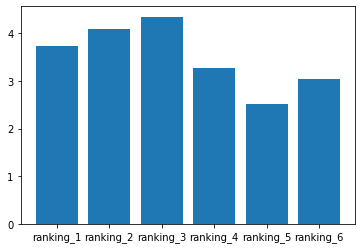

In [37]:
plt.bar(x=star_wars.iloc[:,9:15].columns, height=star_wars.iloc[:,9:15].mean())
plt.show()

Looking at the bar chart above we need to keep in mind that a lower average indicates a higher average ranking.

From the chart we can see that episodes IV, V and VI have average rankings significantly better than I, II and III.
The top average ranked moved appears to be episode V The Empire Strikes Back.

# Movies seen

<BarContainer object of 6 artists>

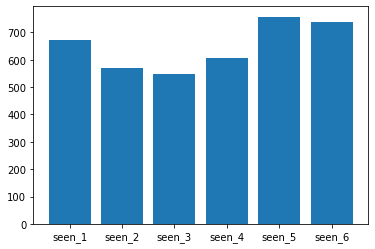

In [49]:
plt.bar(x= star_wars.iloc[:,3:9].columns, height=star_wars.iloc[:,3:9].sum())

From the chart above it appears that the most seen movies are episode V and VI. Interestingly episode I appears to be seen more than episode IV. This may be as a result of the demographic of survey participants, or perhaps because of the hype around episode I (the first new Star Wars film for a generation)

# Review rankings and movies seen by gender

In [41]:
star_wars['Gender'].value_counts()

Female    549
Male      496
Name: Gender, dtype: int64

In [43]:
male = star_wars[star_wars['Gender']=='Male']
female = star_wars[star_wars['Gender']=='Female']

### Ranking

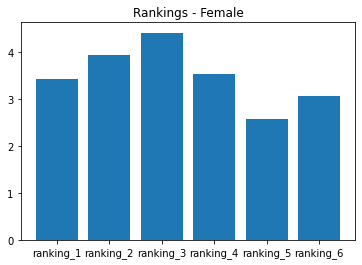

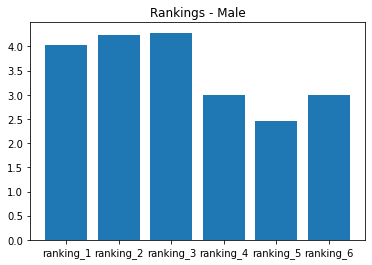

In [47]:
plt.bar(x=female.iloc[:,9:15].columns, height=female.iloc[:,9:15].mean())
plt.title("Rankings - Female")
plt.show()

plt.bar(x=male.iloc[:,9:15].columns, height=male.iloc[:,9:15].mean())
plt.title("Rankings - Male")
plt.show()

### Seen

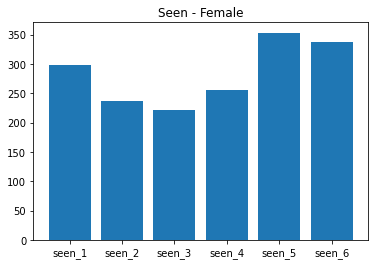

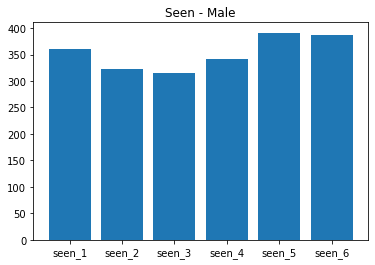

In [51]:
plt.bar(x=female.iloc[:,3:9].columns, height=female.iloc[:,3:9].sum())
plt.title("Seen - Female")
plt.show()

plt.bar(x=male.iloc[:,3:9].columns, height=male.iloc[:,3:9].sum())
plt.title("Seen - Male")
plt.show()

It appears that for rankings, the males have a much stronger preference for the earlier films (IV, V and VI) where as the females have a slightly more mixed distribution. Nonetheless, the females still do preference the earlier films.

Regarding the movies seen, the males have more even distribution across all movies, where as the females show that more of them have seen the earlier films and less of the most recent films (especially II and III).